In [22]:
import os
import numpy as np
import pandas as pd
import tools as tl
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def loadData(files, subset, coralSuccess=70, lagColumnNames=[], shiftValues=[]):
    df = tl.loadRuns(files, subset)
    df = tl.addPercent(df) ## turn node type counts into percents
    df = tl.scaledByNumberOfNodes(df)
    df = tl.labelCrashStatistics(df, coralSuccess)
    df = tl.normalize(df)
    df = tl.addLag(df, lagColumnNames, shiftValues)
    return(df)

## Overview of model runs

In [24]:
topDirectory = "./output/" #os.getcwd()
files, overviewOfRuns = tl.viewRuns(topDirectory)

overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations,File
0,15,15,0,60,33,33,10,40,20,75,5010,200,100,0
1,15,15,0,50,33,33,10,40,20,75,5010,200,100,1
2,15,15,0,40,33,33,10,40,20,75,5010,200,100,2


## Choose Runs to Explore Via Index

In [25]:
filesOfInterest = [0,1]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

subset = overviewOfRuns.loc[filesOfInterest,:]
df = loadData(files, subset, coralSuccess=60)
df

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,...,coral_neighbors_scaled,turf_neighbors_scaled,macroalgae_neighbors_scaled,turf_percent,macroalgae_percent,coral_percent,coral_patches,turf_patches,macroalgae_patches,patches_algae
0,0,0,70,74,81,0.29,0.32,0.32,14,1,...,0.030688,0.249119,0.024187,0.483871,0.479290,0.357143,0.590909,0.500000,0.684211,0.000000
1,0,200,82,75,68,0.64,0.39,0.59,1,4,...,0.057814,0.405217,0.053121,0.494624,0.402367,0.418367,0.000000,0.250000,0.052632,0.125000
2,0,400,73,89,63,0.66,0.45,0.46,3,4,...,0.066971,0.379580,0.044704,0.645161,0.372781,0.372449,0.090909,0.250000,0.263158,0.125000
3,0,600,75,74,76,0.62,0.36,0.57,4,3,...,0.061235,0.345476,0.045918,0.483871,0.449704,0.382653,0.136364,0.458333,0.105263,0.083333
4,0,800,87,88,50,0.65,0.46,0.44,3,3,...,0.055343,0.410079,0.053878,0.634409,0.295858,0.443878,0.090909,0.250000,0.368421,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,99,4200,0,85,140,0.00,0.40,0.63,1,1,...,NaN,0.317136,0.027551,0.602151,0.828402,0.000000,0.000000,0.541667,0.105263,0.000000
5196,99,4400,0,82,143,0.00,0.40,0.65,1,1,...,NaN,0.347826,0.027829,0.569892,0.846154,0.000000,0.000000,0.458333,0.052632,0.000000
5197,99,4600,0,69,156,0.00,0.39,0.74,1,1,...,NaN,0.485822,0.029042,0.430108,0.923077,0.000000,0.000000,0.375000,0.052632,0.000000
5198,99,4800,0,85,140,0.00,0.40,0.63,1,1,...,NaN,0.317136,0.027551,0.602151,0.828402,0.000000,0.000000,0.416667,0.000000,0.000000


## OR Choose Run to Explore Via Model Parameters

In [27]:
subset = overviewOfRuns[(overviewOfRuns['Grazing'] > 25) &
                        (overviewOfRuns['Grazing'] < 75) &
                        (overviewOfRuns['Grid Option'] == 0) &
                        (overviewOfRuns['Time'] == 5010)]
df = loadData(files, subset, coralSuccess=60)
df

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,...,coral_neighbors_scaled,turf_neighbors_scaled,macroalgae_neighbors_scaled,turf_percent,macroalgae_percent,coral_percent,coral_patches,turf_patches,macroalgae_patches,patches_algae
0,0,0,70,74,81,0.29,0.32,0.32,14,1,...,0.030688,0.249119,0.024187,0.483871,0.424084,0.357143,0.590909,0.500000,0.684211,0.000000
1,0,200,82,75,68,0.64,0.39,0.59,1,4,...,0.057814,0.405217,0.053121,0.494624,0.356021,0.418367,0.000000,0.250000,0.052632,0.125000
2,0,400,73,89,63,0.66,0.45,0.46,3,4,...,0.066971,0.379580,0.044704,0.645161,0.329843,0.372449,0.090909,0.250000,0.263158,0.125000
3,0,600,75,74,76,0.62,0.36,0.57,4,3,...,0.061235,0.345476,0.045918,0.483871,0.397906,0.382653,0.136364,0.458333,0.105263,0.083333
4,0,800,87,88,50,0.65,0.46,0.44,3,3,...,0.055343,0.410079,0.053878,0.634409,0.261780,0.443878,0.090909,0.250000,0.368421,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,99,4200,0,65,160,0.00,0.36,0.74,1,1,...,NaN,0.465552,0.028316,0.387097,0.837696,0.000000,0.000000,0.458333,0.052632,0.000000
7796,99,4400,0,69,156,0.00,0.35,0.69,1,1,...,NaN,0.382483,0.027080,0.430108,0.816754,0.000000,0.000000,0.458333,0.052632,0.000000
7797,99,4600,0,60,165,0.00,0.24,0.73,1,1,...,NaN,0.191304,0.027087,0.333333,0.863874,0.000000,0.000000,0.833333,0.000000,0.000000
7798,99,4800,0,58,167,0.00,0.23,0.73,1,1,...,NaN,0.185157,0.026763,0.311828,0.874346,0.000000,0.000000,0.791667,0.000000,0.000000


## Grazing Temporal Plots

### Boxplot

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

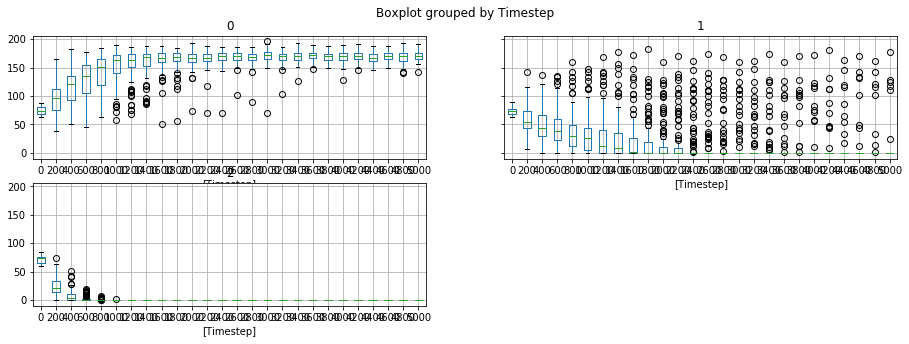

In [28]:
df.groupby(['File']).boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

### Seaborn

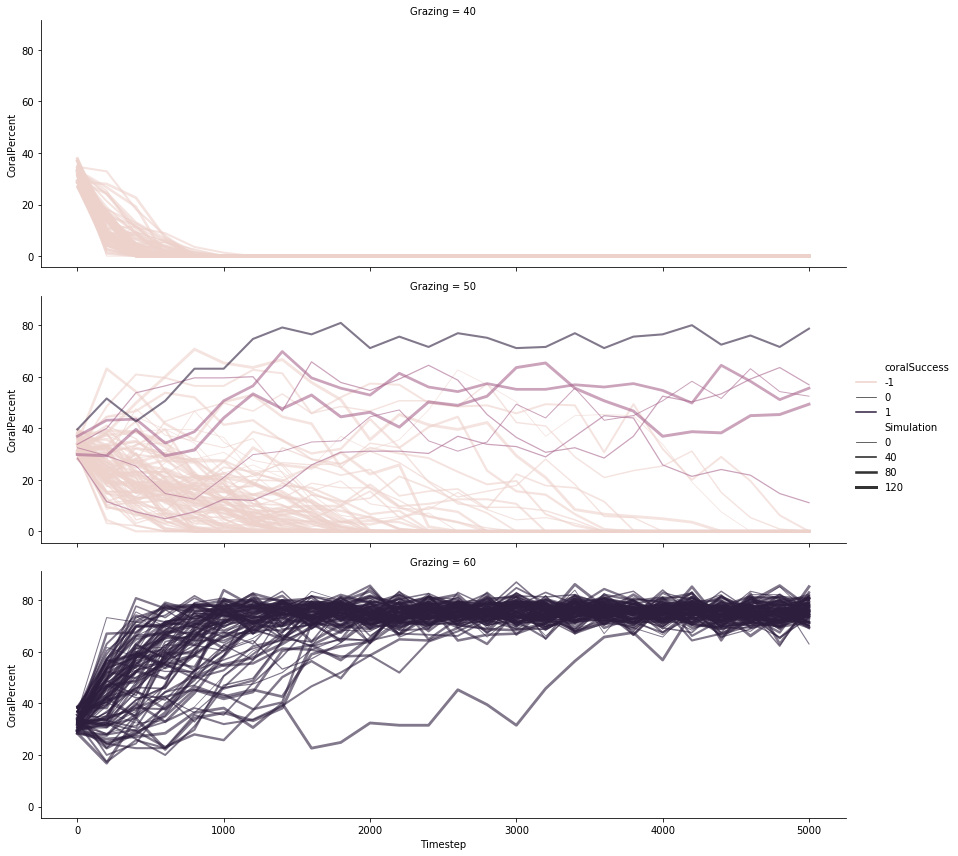

In [29]:
sns.relplot(x="Timestep", y="CoralPercent", row='Grazing', hue='coralSuccess',
            size='Simulation', data=df, kind="line", height=4, aspect=3, alpha=.6)

## Spatial Metrics Histograms  - Neighbors

In [17]:
df.columns

Index(['Simulation', 'Timestep', 'CoralCount', 'TurfCount', 'MacroalgaeCount',
       'Coral-CoralNeighbors', 'Turf-TurfNeighbors', 'Macro-MacroNeighbors',
       'CoralPatchCount', 'AlgaePatchCount', 'TurfPatchCount',
       'MacroPatchCount', 'File', 'Rows', 'Columns', 'Grid Option', 'Grazing',
       'Initial Coral Percent', 'Initial Macroalgae Percent', 'r', 'd', 'a',
       'y', 'Time', 'Record Rate', 'Number of Simulations', 'CoralPercent',
       'TurfPercent', 'MacroalgaePercent', 'CoralPatchCount_Scaled',
       'TurfPatchCount_Scaled', 'MacroPatchCount_Scaled',
       'AlgaePatchCount_Scaled', 'AlgaePatchCount_MScaled',
       'AlgaePatchCount_TScaled', 'CoralNeighbors_Scaled',
       'TurfNeighbors_Scaled', 'MacroNeighbors_Scaled', 'coralSuccess',
       'coral_neighbors', 'turf_neighbors', 'macroalgae_neighbors',
       'coral_neighbors_scaled', 'turf_neighbors_scaled',
       'macroalgae_neighbors_scaled', 'turf_percent', 'macroalgae_percent',
       'coral_percent', 'cora

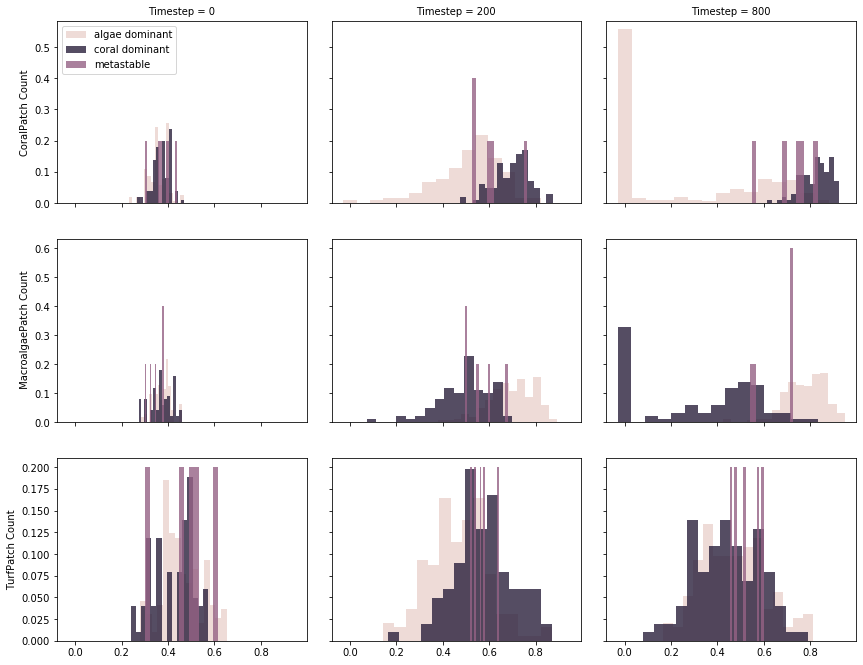

In [30]:
variables = ['coral_neighbors','macroalgae_neighbors','turf_neighbors']
timesteps = [0,200,800]

fig, ax = plt.subplots(len(variables), len(timesteps), figsize=(12,10), sharey='row', sharex=True)

colors = {-1:'#EAD3CD', 0:'#956285', 1:'#2A203C'}
legend_keys = {-1:'algae dominant', 0:'metastable', 1:'coral dominant'}
ylabels = ['Coral', ' Macroalgae', 'Turf' ]
row = 0

for variable in variables:
    for column in range(0,len(timesteps)):
        for success in [-1,1,0]:
            array = df[(df['Timestep']==timesteps[column]) & (df['coralSuccess'] == success)][variable]
            hist, bins = np.histogram(array, bins=15)
            ax[row,column].bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color=colors[success], alpha=.8, label=legend_keys[success])        
        ax[0,column].set_title('Timestep = ' + str(timesteps[column]),fontsize=10)        
    ax[row,0].set_ylabel(ylabels[row] + 'Patch Count')
    row = row + 1
    
ax[0,0].legend(loc='upper left')
#fig.suptitle('Normalized average same-species neighbors for simulations with ' + '\n' +'varying final coral successes :: Grazing=.5, Initial Coral=50%', fontsize=17) # or plt.suptitle('Main title')

fig.tight_layout()
fig.subplots_adjust(top=.9, wspace=.1, hspace=.2)
neighbors_plot = plt
#plt.savefig('figures_paper/hist_neighbors_small.png', dpi=200)
plt.show()

## TDA, Grid Analysis